In [3]:
import sys

import tensorflow.keras
import pandas as pd
import sklearn as sk
import scipy as sp
import tensorflow as tf
import platform

print(f"Python Platform: {platform.platform()}")
print(f"Tensor Flow Version: {tf.__version__}")
print(f"Keras Version: {tensorflow.keras.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print(f"SciPy {sp.__version__}")
gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if gpu else "NOT AVAILABLE")


Python Platform: macOS-12.3-arm64-arm-64bit
Tensor Flow Version: 2.12.0
Keras Version: 2.12.0

Python 3.10.9 (main, Jan 11 2023, 09:18:18) [Clang 14.0.6 ]
Pandas 2.0.0
Scikit-Learn 1.2.2
SciPy 1.10.1
GPU is available


In [24]:
from sklearn.model_selection import train_test_split

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [8]:
data = pd.read_csv('msft_stock_data.csv')

In [9]:
# Extract the closing price column
closing_prices = data['Close'].values.reshape(-1, 1)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(closing_prices)

# Create sequences for training
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length - 1):
        X.append(data[i:(i + sequence_length), 0])
        y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(y)

sequence_length = 60
X, y = create_sequences(scaled_prices, sequence_length)

# Reshape the input for the LSTM model
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [28]:
model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
41/41 [==============================] - 2s 39ms/step - loss: 2.4030e-04
Epoch 2/50
41/41 [==============================] - 1s 28ms/step - loss: 2.5299e-04
Epoch 3/50
41/41 [==============================] - 1s 29ms/step - loss: 2.3104e-04
Epoch 4/50
41/41 [==============================] - 1s 30ms/step - loss: 2.3117e-04
Epoch 5/50
41/41 [==============================] - 1s 30ms/step - loss: 2.2168e-04
Epoch 6/50
41/41 [==============================] - 1s 29ms/step - loss: 2.3155e-04
Epoch 7/50
41/41 [==============================] - 1s 31ms/step - loss: 2.2428e-04
Epoch 8/50
41/41 [==============================] - 1s 30ms/step - loss: 2.2549e-04
Epoch 9/50
41/41 [==============================] - 1s 29ms/step - loss: 2.4170e-04
Epoch 10/50
41/41 [==============================] - 1s 29ms/step - loss: 2.0158e-04
Epoch 11/50
41/41 [==============================] - 1s 29ms/step - loss: 2.3137e-04
Epoch 12/50
41/41 [==============================] - 1s 28ms/step - loss: 

21/21 [==============================] - 1s 21ms/step


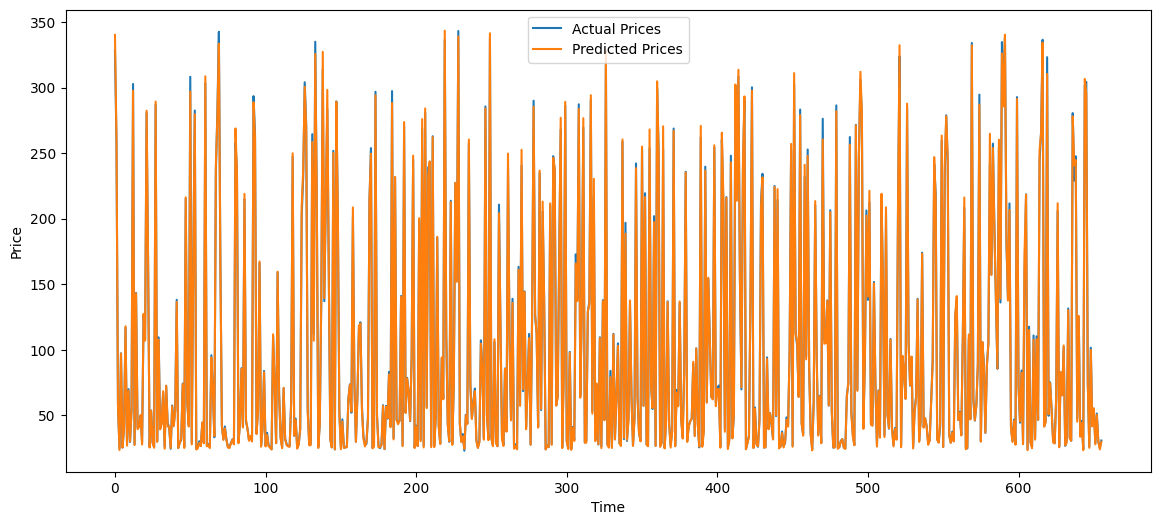

In [29]:
# Predict the stock prices using the test data
y_pred = model.predict(X_test)
y_pred_rescaled = scaler.inverse_transform(y_pred)

# Rescale the test data
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Visualize the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Prices')
plt.plot(y_pred_rescaled, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [31]:
X_test_rescaled

NameError: name 'X_test_rescaled' is not defined

In [18]:
X_test

array([], dtype=float64)